In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('loan.csv')

C:\Users\SHAMBHAVI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [25]:
df.drop(['acc_now_delinq','acc_open_past_24mths','all_util','annual_inc_joint','avg_cur_bal','bc_open_to_buy','bc_util','delinq_amnt','dti_joint','il_util','inq_fi','inq_last_12m','max_bal_bc','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_last_delinq','mths_since_last_major_derog','mths_since_last_record','mths_since_rcnt_il','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','open_acc_6m','open_il_12m','open_il_24m','open_il_6m','open_rv_12m','open_rv_24m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_coll_amt','tot_cur_bal','tot_hi_cred_lim','total_bal_ex_mort','total_bal_il','total_bc_limit','total_cu_tl','total_il_high_credit_limit','total_rev_hi_lim','url','verification_status_joint'],axis=1,inplace=True)


In [26]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,Apr-08,0.00,NaN,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,Jan-08,0.00,NaN,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,Jun-10,256.59,NaN,Jun-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN


In [27]:
a=df.isnull().sum()
a=a[a>0]

In [28]:
## Columns hving null values -- 
a

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [33]:
cat_cols=["term","grade","sub_grade","emp_title","home_ownership","verification_status","issue_d","loan_status","purpose","title","zip_code","addr_state"]
num_cols=["loan_amnt","funded_amnt","funded_amnt_inv","installment","annual_inc","total_acc","total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee","total_rec_prncp"]

In [35]:
df.duplicated().sum()

0

In [ ]:
df['loan_status'].value_counts()

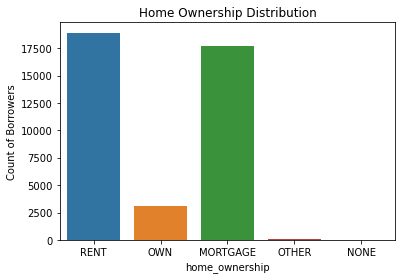

In [44]:
sns.countplot(x=df['home_ownership'])
plt.title('Home Ownership Distribution')
plt.ylabel('Count of Borrowers')
plt.show()


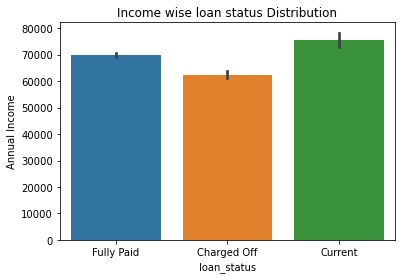

In [45]:
sns.barplot(x=df['loan_status'],y=df['annual_inc'])
plt.title('Income wise loan status Distribution')
plt.ylabel('Annual Income')
plt.show()


In [39]:
#sns.barplot(x=df['loan_status'],y=df['home_ownership'])
#plt.show()


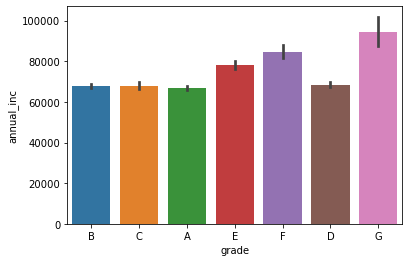

In [40]:
sns.barplot(x=df['grade'],y=df['annual_inc'])
plt.show()


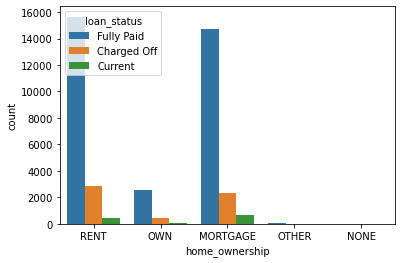

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.show()

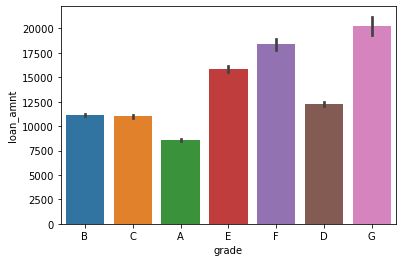

In [19]:
sns.barplot(x=df['grade'],y=df['loan_amnt'])
plt.show()

In [37]:
#sns.barplot(y=df['purpose'],x=df['loan_amnt'])
#plt.show()

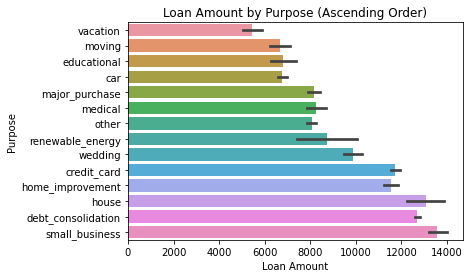

In [36]:
order = df.groupby('purpose')['loan_amnt'].median().sort_values().index

# Plot the horizontal bar plot
sns.barplot(y=df['purpose'], x=df['loan_amnt'], order=order)
plt.xlabel('Loan Amount')
plt.ylabel('Purpose')
plt.title('Loan Amount by Purpose (Ascending Order)')
plt.show()

In [55]:
verification_count=df.groupby(['verification_status','member_id']).nunique()


In [58]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [61]:
loan_status_per=df['loan_status'].value_counts(normalize=True)*100

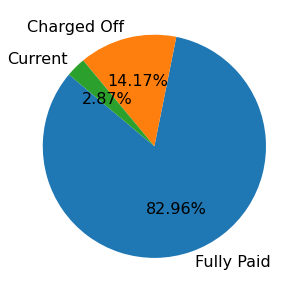

In [66]:
plt.figure(figsize=(5,6))
plt.pie(loan_status_per, autopct='%1.2f%%',labels=loan_status_per.index, startangle=140,textprops={'fontsize': 16})
plt.show()


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

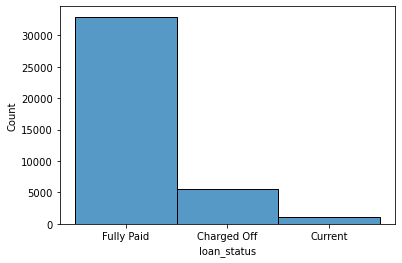

In [54]:
sns.histplot(data=df,x='loan_status')

<AxesSubplot:xlabel='verification_status', ylabel='Count'>

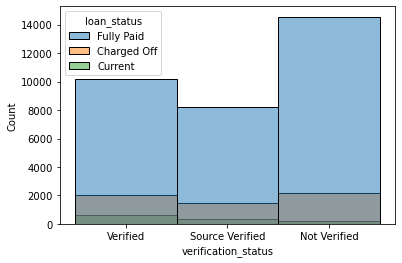

In [51]:
sns.histplot(data=df,x='verification_status',hue='loan_status')

<AxesSubplot:xlabel='verification_status', ylabel='count'>

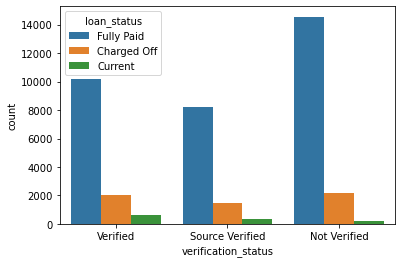

In [52]:
sns.countplot(data=df,x='verification_status',hue='loan_status')

In [47]:
#sns.barplot(x=verification_count.index,y=verification_count.values,palette="pastel")

#plt.xlabel('Verification Status')
#plt.ylabel('Number of Unique Users')
#plt.title('Number of Unique Users by Verification Status')
#plt.show()

In [48]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                    